In [1]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar
from scipy.special import erf
import scipy.constants as const
import plot_functions as p_func
import pandas as pd


In [2]:
## latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [3]:
c_scheme = p_func.c_scheme_02()

def volt_N(V_input):
    vmax = 0.3135176
    n0 = 8535254.64629534

    n = n0 * V_input / vmax

    return n

# Background

In [4]:
fname1b = "data_temperature/scope_35.csv"
csv_data_1b = pd.read_csv(fname1b, sep=",", skiprows=[1])
# csv_data_1
time = csv_data_1b["x-axis"]
volt = csv_data_1b["4"]

volt

0       0.030427
1       0.028417
2       0.022387
3       0.030427
4       0.030427
          ...   
1995    0.028417
1996    0.030427
1997    0.030427
1998    0.030427
1999    0.030427
Name: 4, Length: 2000, dtype: float64

Average background (with dips being ignored) = 0.03


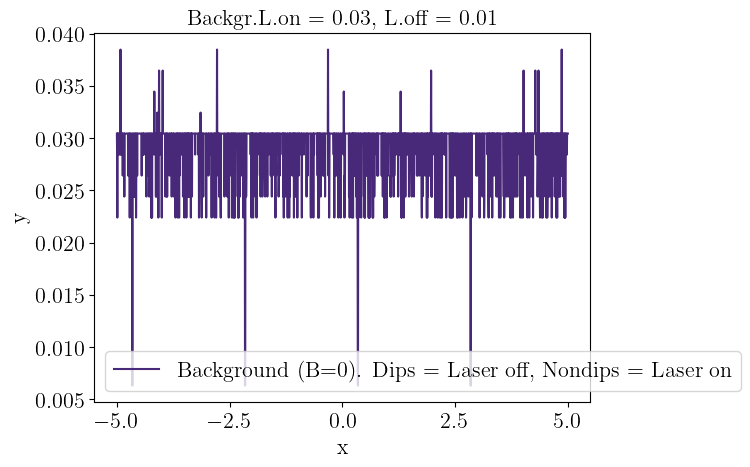

In [5]:
data_to_range = [
    [time, volt, "Background (B=0). Dips = Laser off, Nondips = Laser on ", c_scheme[1], "-", ""],
]

laser_on = volt[volt > 0.02]
laser_off = volt[volt <= 0.02]

background_laser_on = laser_on.mean()
background_laser_off = laser_off.mean()


print(f"Average background (with dips being ignored) = {background_laser_on:.2f}")

p_func.plot_with_one_axis(data_to_range, name_x='x', name_y='y', plot_title=f"Backgr.L.on = {background_laser_on:.2f}, L.off = {background_laser_off:.2f}", filename_to_save='nosvg', marker_size='5', font_size=16, offset_text_size=16, legend_local='best', legend_size=16, x_ticks_limit=5, x_ticks_numstyle='sci', line_width=1.5, y_lim=None)

In [6]:
thresholdsDecrease = [0.07, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.05, 0.05, 0.05, 0.05]
thresholdsIncrease = [0.07, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.1, 0.02, 0.02, 0.02, 0.02]
ms_trap_of   =       [60,   150,  140,  130,  120,  110,  100,  90,   80,   70,   60,   50,  40,   30,   20,   10  ]
fname_endings =      ["19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30","31", "32", "33", "34"]

up_len = 34
low_len = 15


# load files

In [7]:
fnames = []

fname_endings = ["19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34"]

for numb in fname_endings:
    fnames.append(f"data_temperature/scope_{numb}.csv")


# Look at single file

-2.85
430    0.431323
431    0.429313
432    0.427304
433    0.419263
434    0.435343
         ...   
575    0.425293
576    0.419263
577    0.419263
578    0.427304
579    0.425293
Name: 4, Length: 150, dtype: float64
10
trap off 2
ratio 1.0057256014148888


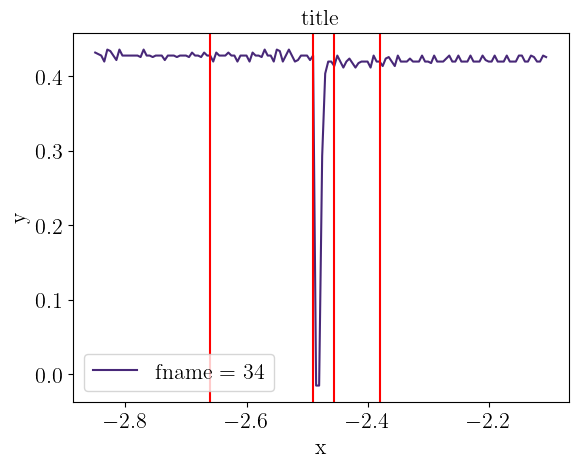

In [8]:
idx = 15
file = fnames[idx]

csv_data_1 = pd.read_csv(file, sep=",", skiprows=[1])
time = csv_data_1["x-axis"]
volt = csv_data_1["4"] - background_laser_on # in voltage, not in number of atoms

# [  76  576 1076 1576]
# [  88   89  588  589 1088 1588]



von1, zu1 = 300, 390
von1, zu1 = 430, 580

data_to_range = [
    [time[von1:zu1], volt[von1:zu1], f"fname = {fname_endings[idx]}", c_scheme[1], "-", ""],
]

print(time[von1])
print(volt[von1:zu1])

print(ms_trap_of[idx])
step = 0.005 # s
ms_example = 150*1e-3 # s
trap_off_in_datapoints = int(ms_trap_of[idx]*1e-3 / step)
print("trap off", trap_off_in_datapoints)
buffer = 5

meanUP  = volt[331 - up_len : 331].mean()
meanLOW = volt[331 + trap_off_in_datapoints + buffer : 331 + trap_off_in_datapoints + buffer + low_len].mean()
ratio = meanLOW / meanUP
print("ratio", ratio)
# ratio 1.0057256014148888


vlins = [
    [time[502 - up_len], "r", "-"],
    [time[502], "r", "-"],

    [time[502 + trap_off_in_datapoints + buffer], "r", "-"],

    [time[502 + trap_off_in_datapoints + buffer + low_len], "r", "-"],

]

# vlins = [
#     [time[502], "r", "-"],
#     [time[502 + trap_off_in_datapoints + buffer], "r", "-"]
# ]


# 

# index 1
# indices: 331 361
# ratio {0} 0.05293052581164871 error 0.010480268557830533
# indices: 831 861
# ratio {1} 0.05403497028061307 error 0.009545986369452671
# indices: 1331 1361
# ratio {2} 0.05614501601277646 error 0.010130324313924476
# indices: 1831 1861
# ratio {3} 0.05284568960399263 error 0.009962454155791951
# all ratios:  [0.05293053 0.05403497 0.05614502 0.05284569]
# Final recapture ratio (150 ms): 0.0540 ± 0.0008
# [ 331  831 1331 1831]
# [ 361  861 1361 1861]
# [[-3.345, 'red', '-'], [-3.195, 'blue', '-'], [-0.845, 'red', '-'], [-0.695, 'blue', '-'], [1.655, 'red', '-'], [1.805, 'blue', '-'], [4.155, 'red', '-'], [4.305, 'blue', '-']]


# index 15
# indices: 502 504
# ratio {1} 0.8902162238751242 error 0.06896802528419686
# indices: 1002 1004
# ratio {2} 0.8889474748187846 error 0.07006815134357276
# indices: 1502 1504
# ratio {3} 0.8869134584754731 error 0.0686001165368463
# all ratios:  [0.89021622 0.88894747 0.88691346]
# Final recapture ratio (10 ms): 0.8887 ± 0.0010
# [   2  502 1002 1502]
# [   4    5    6  158  210  213  218  222  504  505 1004 1005 1006 1504
#  1505]


p_func.plot_with_one_axis_with_vertical_lines(data_to_range, name_x="x", name_y="y", plot_title="title", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, vlines=vlins, y_lim = None) #(0.4,0.45)) # [data_x, data_y, label, colorr, line_style, marker_type], [[x_val, color, linestyle], ...]


# Test individual file (LINES)

[  76  576 1076 1576]
[  88   89  588  589 1088 1588]
up = 0.377 pm 0.001, low = 0.163 pm 0.001, fraction = 0.4315835309543023


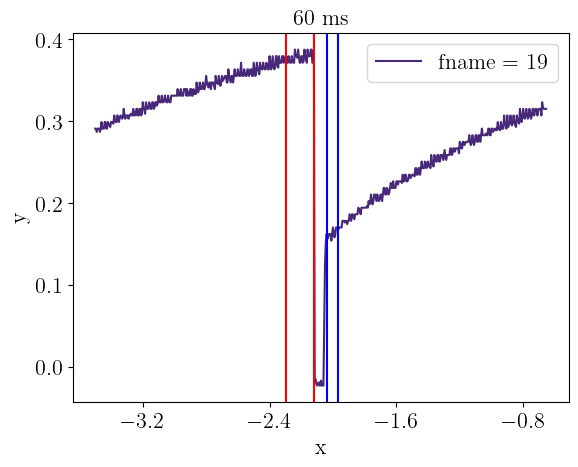

In [9]:

idx = 0
file = fnames[idx]

csv_data_1 = pd.read_csv(file, sep=",", skiprows=[1])
time = csv_data_1["x-axis"]
volt = csv_data_1["4"] - background_laser_on # in voltage, not in number of atoms

thresholdD = thresholdsDecrease[idx]
thresholdI = thresholdsIncrease[idx]

gap_indices_decrease = np.where((np.diff(volt)) < -thresholdD)[0]
gap_indices_increase = np.where((np.diff(volt)) > thresholdI)[0]


v_lines = []
for i in range(4):
    if gap_indices_decrease[0] + i*500 < len(time):
        v_lines.append([time[gap_indices_decrease[0] + i*500], "red", "-"])
        v_lines.append([time[gap_indices_increase[0] + i*500], "blue", "-"])
        pass

von1, zu1 = 300, -1130

vlines_temp = [
    [time[541], "red", "-"],
    [time[541 + 35], "red", "-"],
    [time[592], "blue", "-"],
    [time[592 + 15], "blue", "-"],
]

meanUP = volt[541:541+34].mean()
errorUP = np.std(volt[541:541+34], ddof=1) / np.sqrt(len(volt[541:541+34]))

meanLOW = volt[592:592+15].mean()
errorLOW = np.std(volt[592:592+15], ddof=1) / np.sqrt(len(volt[592:592+15]))


print(gap_indices_decrease)
print(gap_indices_increase)
print(f"up = {meanUP:.3f} pm {errorUP:.3f}, low = {meanLOW:.3f} pm {errorLOW:.3f}, fraction = {meanLOW / meanUP}")

data_to_range = [
    [time[von1:zu1], volt[von1:zu1], f"fname = {fname_endings[idx]}", c_scheme[1], "-", ""],
]

p_func.plot_with_one_axis_with_vertical_lines(data_to_range, name_x="x", name_y="y", plot_title=f"{ms_trap_of[idx]} ms", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, vlines=vlines_temp, y_lim = None) # [data_x, data_y, label, colorr, line_style, marker_type], [[x_val, color, linestyle], ...]


In [10]:
t_lines = [[-3.345, 'red', '-'], [-3.195, 'blue', '-'], [-0.845, 'red', '-'], [-0.695, 'blue', '-'], [1.655, 'red', '-'], [1.805, 'blue', '-'], [4.155, 'red', '-'], [4.305, 'blue', '-']]


In [11]:
# fr_df = pd.DataFrame(columns=["time", "fr", "err"])

# fr_df["time"] = 0
# fr_df["fr"] = 0
# fr_df["err"] = 0

# fr_df

# all other data points

index 0
indices: 76 88
ratio {0} 0.43419289207561484 error 0.002891794078714937
indices: 576 588
ratio {1} 0.4326493624233272 error 0.0038778856433838997
indices: 1076 1088
ratio {2} 0.43810099463341967 error 0.002832374155171048
indices: 1576 1588
ratio {3} 0.4341004136049986 error 0.002958076683051325
all ratios:  [0.43419289 0.43264936 0.43810099 0.43410041]
Final recapture ratio (60 ms): 0.4348 ± 0.0012
[  76  576 1076 1576]
[  88   89  588  589 1088 1588]
[[-4.62, 'red', '-'], [-4.56, 'blue', '-'], [-2.12, 'red', '-'], [-2.06, 'blue', '-'], [0.38, 'red', '-'], [0.44, 'blue', '-'], [2.88, 'red', '-'], [2.94, 'blue', '-']]


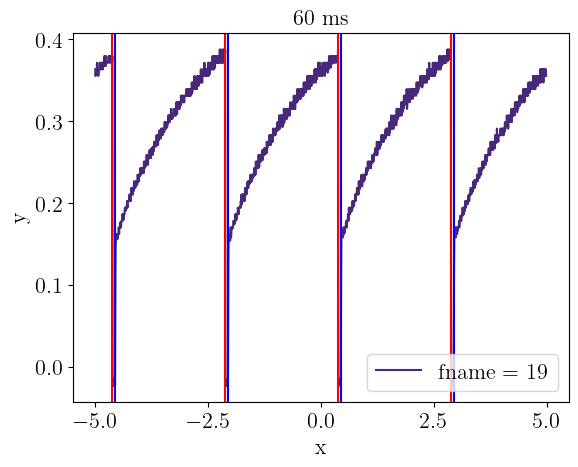

index 1
indices: 331 361
ratio {0} 0.07986095765528595 error 0.005101773204692219
indices: 831 861
ratio {1} 0.07759086567635302 error 0.003954863736209108
indices: 1331 1361
ratio {2} 0.08007149848022889 error 0.0037941118628690776
indices: 1831 1861
ratio {3} 0.07721900921768436 error 0.004164413932502091
all ratios:  [0.07986096 0.07759087 0.0800715  0.07721901]
Final recapture ratio (150 ms): 0.0787 ± 0.0007
[ 331  831 1331 1831]
[ 361  861 1361 1861]
[[-3.345, 'red', '-'], [-3.195, 'blue', '-'], [-0.845, 'red', '-'], [-0.695, 'blue', '-'], [1.655, 'red', '-'], [1.805, 'blue', '-'], [4.155, 'red', '-'], [4.305, 'blue', '-']]


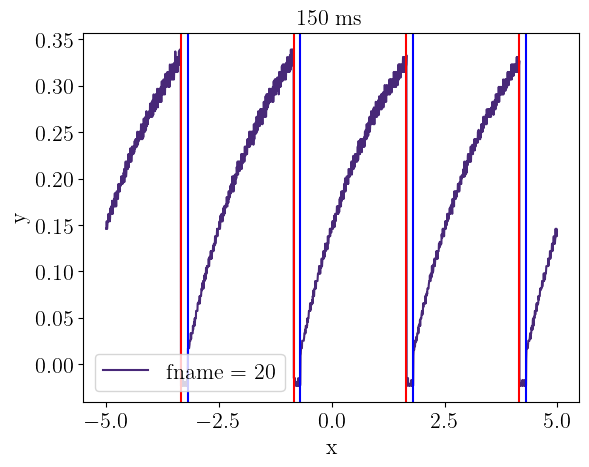

index 2
indices: 82 110
ratio {0} 0.0959714785229094 error 0.0031818911216880434
indices: 582 610
ratio {1} 0.09330346942507063 error 0.003968469199484564
indices: 1082 1110
ratio {2} 0.09139813120674009 error 0.00443787519289315
indices: 1582 1610
ratio {3} 0.09455478036371597 error 0.003814790547426975
all ratios:  [0.09597148 0.09330347 0.09139813 0.09455478]
Final recapture ratio (140 ms): 0.0938 ± 0.0010
[  82  582 1082 1582]
[ 110  610 1110 1610]
[[-4.59, 'red', '-'], [-4.45, 'blue', '-'], [-2.09, 'red', '-'], [-1.95, 'blue', '-'], [0.41, 'red', '-'], [0.55, 'blue', '-'], [2.91, 'red', '-'], [3.05, 'blue', '-']]


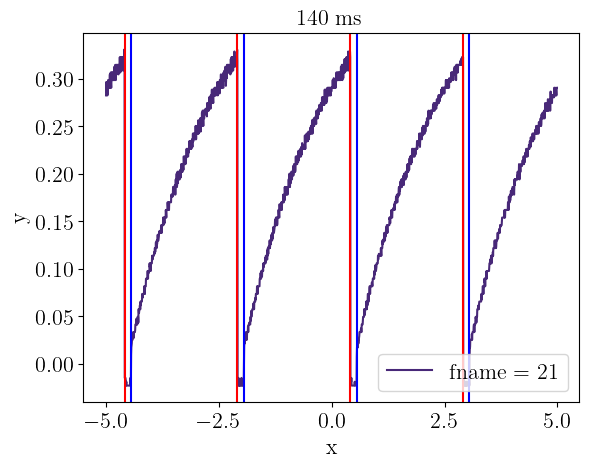

index 3
indices: 71 97
ratio {0} 0.1020186683604791 error 0.004911773027144984
indices: 571 597
ratio {1} 0.10548258945785523 error 0.004554332172246331
indices: 1071 1097
ratio {2} 0.10310284124045407 error 0.0052098439865941445
indices: 1571 1597
ratio {3} 0.10432782956941718 error 0.004969502731083071
all ratios:  [0.10201867 0.10548259 0.10310284 0.10432783]
Final recapture ratio (130 ms): 0.1037 ± 0.0008
[  71  571 1071 1571]
[  97  597 1097 1597]
[[-4.645, 'red', '-'], [-4.515, 'blue', '-'], [-2.145, 'red', '-'], [-2.015, 'blue', '-'], [0.355, 'red', '-'], [0.485, 'blue', '-'], [2.855, 'red', '-'], [2.985, 'blue', '-']]


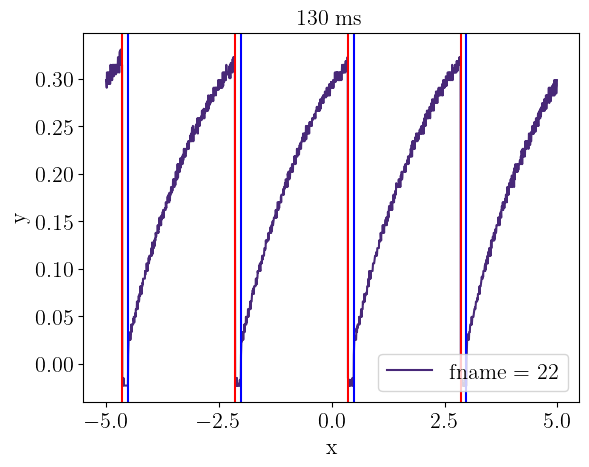

index 4
indices: 80 104
ratio {0} 0.12884087145843295 error 0.004281167399843807
indices: 580 604
ratio {1} 0.12527610131280387 error 0.004001356749638414
indices: 1080 1104
ratio {2} 0.12213965255361162 error 0.003369560980299675
indices: 1580 1604
ratio {3} 0.12245382031133273 error 0.0036449700764065673
all ratios:  [0.12884087 0.1252761  0.12213965 0.12245382]
Final recapture ratio (120 ms): 0.1247 ± 0.0016
[  80  580 1080 1580]
[ 104  604 1104 1448 1480 1496 1524 1528 1536 1556 1604]
[[-4.6, 'red', '-'], [-4.48, 'blue', '-'], [-2.1, 'red', '-'], [-1.98, 'blue', '-'], [0.4, 'red', '-'], [0.52, 'blue', '-'], [2.9, 'red', '-'], [3.02, 'blue', '-']]


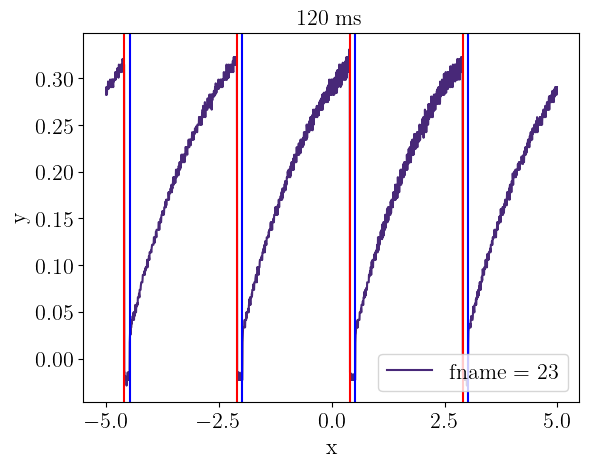

index 5
indices: 327 349
ratio {0} 0.14745861090618753 error 0.0033353066142775417
indices: 827 849
ratio {1} 0.1471163655619866 error 0.0032795899164245945
indices: 1327 1349
ratio {2} 0.15175908621984818 error 0.0041595354422898495
indices: 1827 1849
ratio {3} 0.15396359444217272 error 0.005187007888713093
all ratios:  [0.14745861 0.14711637 0.15175909 0.15396359]
Final recapture ratio (110 ms): 0.1501 ± 0.0017
[ 327  827 1327 1827]
[ 349  849 1349 1849]
[[-3.365, 'red', '-'], [-3.255, 'blue', '-'], [-0.865, 'red', '-'], [-0.755, 'blue', '-'], [1.635, 'red', '-'], [1.745, 'blue', '-'], [4.135, 'red', '-'], [4.245, 'blue', '-']]


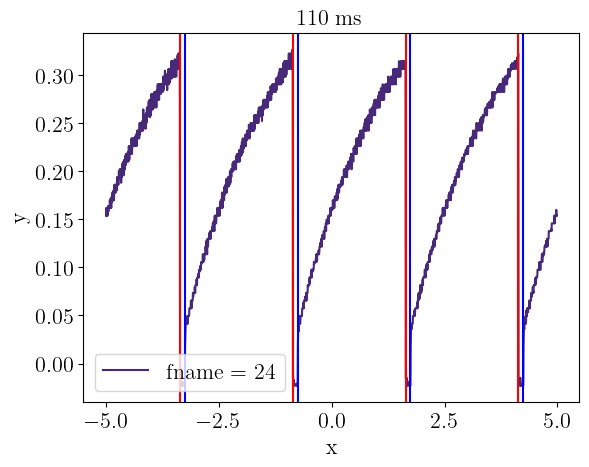

index 6
indices: 247 267
ratio {0} 0.17991604588303756 error 0.0035617442425730757
indices: 747 767
ratio {1} 0.1783498200429843 error 0.003630685410062012
indices: 1247 1267
ratio {2} 0.18167723559029422 error 0.0039985237976395555
indices: 1747 1767
ratio {3} 0.18399523891790515 error 0.003364327342537389
all ratios:  [0.17991605 0.17834982 0.18167724 0.18399524]
Final recapture ratio (100 ms): 0.1810 ± 0.0012
[ 247  747 1247 1747]
[ 267  767  768 1267 1268 1740 1767 1768 1960]
[[-3.765, 'red', '-'], [-3.665, 'blue', '-'], [-1.265, 'red', '-'], [-1.165, 'blue', '-'], [1.235, 'red', '-'], [1.335, 'blue', '-'], [3.735, 'red', '-'], [3.835, 'blue', '-']]


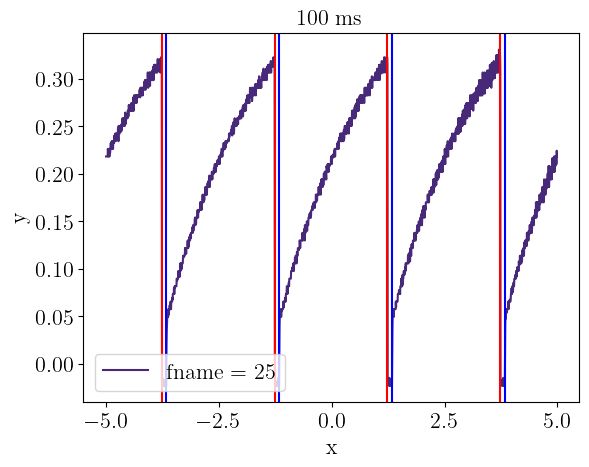

index 7
indices: 39 57
ratio {0} 0.24743519682286452 error 0.0037565841944620197
indices: 539 557
ratio {1} 0.23160286584589743 error 0.004084706864787461
indices: 1039 1057
ratio {2} 0.22716191872668837 error 0.004316308541036289
indices: 1539 1557
ratio {3} 0.22656876454155359 error 0.004207177961604676
all ratios:  [0.2474352  0.23160287 0.22716192 0.22656876]
Final recapture ratio (90 ms): 0.2332 ± 0.0049
[  39  539 1039 1539]
[  57  557 1057 1557]
[[-4.805, 'red', '-'], [-4.715, 'blue', '-'], [-2.305, 'red', '-'], [-2.215, 'blue', '-'], [0.195, 'red', '-'], [0.285, 'blue', '-'], [2.695, 'red', '-'], [2.785, 'blue', '-']]


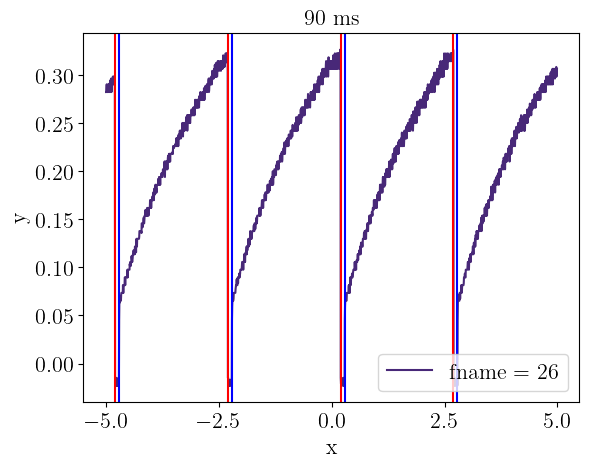

index 8
indices: 297 313
ratio {0} 0.2946090177036753 error 0.004188252804438511
indices: 797 813
ratio {1} 0.2854822026704541 error 0.004140923918332248
indices: 1297 1313
ratio {2} 0.28626861710042656 error 0.003490916466592705
indices: 1797 1813
ratio {3} 0.2719701045463073 error 0.0033990510175103674
all ratios:  [0.29460902 0.2854822  0.28626862 0.2719701 ]
Final recapture ratio (80 ms): 0.2846 ± 0.0047
[ 297  797 1297 1797]
[ 313  314  813 1313 1813]
[[-3.515, 'red', '-'], [-3.435, 'blue', '-'], [-1.015, 'red', '-'], [-0.935, 'blue', '-'], [1.485, 'red', '-'], [1.565, 'blue', '-'], [3.985, 'red', '-'], [4.065, 'blue', '-']]


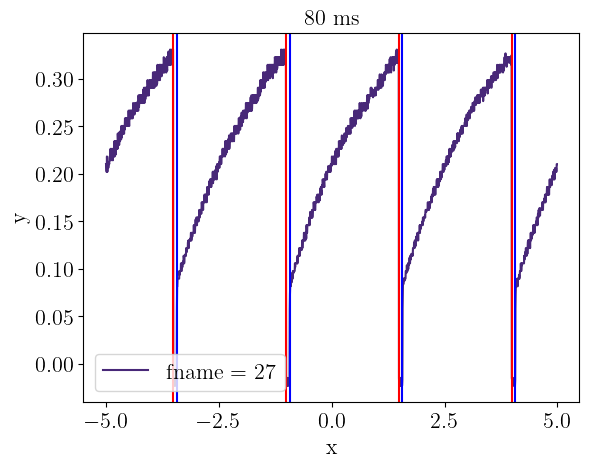

index 9
indices: 93 107
ratio {0} 0.3665334029440752 error 0.003930784651029238
indices: 593 607
ratio {1} 0.35872372159033905 error 0.0029986024311963485
indices: 1093 1107
ratio {2} 0.3611081880607112 error 0.004438109814084636
indices: 1593 1607
ratio {3} 0.35531450143499177 error 0.003492455282634179
all ratios:  [0.3665334  0.35872372 0.36110819 0.3553145 ]
Final recapture ratio (70 ms): 0.3604 ± 0.0024
[  93  593 1093 1593]
[ 107  108  607  608 1107 1108 1480 1607 1608]
[[-4.535, 'red', '-'], [-4.465, 'blue', '-'], [-2.035, 'red', '-'], [-1.965, 'blue', '-'], [0.465, 'red', '-'], [0.535, 'blue', '-'], [2.965, 'red', '-'], [3.035, 'blue', '-']]


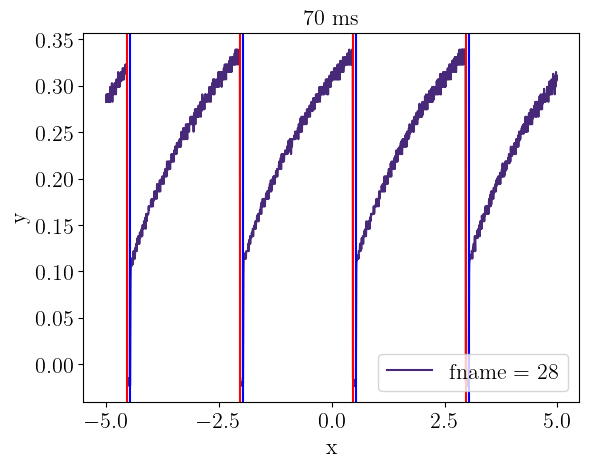

index 10
indices: 247 258
ratio {0} 0.4621487416825863 error 0.0036087003357504204
indices: 747 758
ratio {1} 0.43921806374555705 error 0.0035405435346324817
indices: 1247 1258
ratio {2} 0.43036422360265675 error 0.003360487122143161
indices: 1747 1758
ratio {3} 0.43631409414716904 error 0.003198688362951208
all ratios:  [0.46214874 0.43921806 0.43036422 0.43631409]
Final recapture ratio (60 ms): 0.4420 ± 0.0070
[ 247  747 1247 1746 1747]
[ 258  259  260  461  561  581  609  621  633  641  669  689  733  737
  758  759  760 1259 1260 1759 1760]
[[-3.765, 'red', '-'], [-3.71, 'blue', '-'], [-1.265, 'red', '-'], [-1.21, 'blue', '-'], [1.235, 'red', '-'], [1.29, 'blue', '-'], [3.735, 'red', '-'], [3.79, 'blue', '-']]


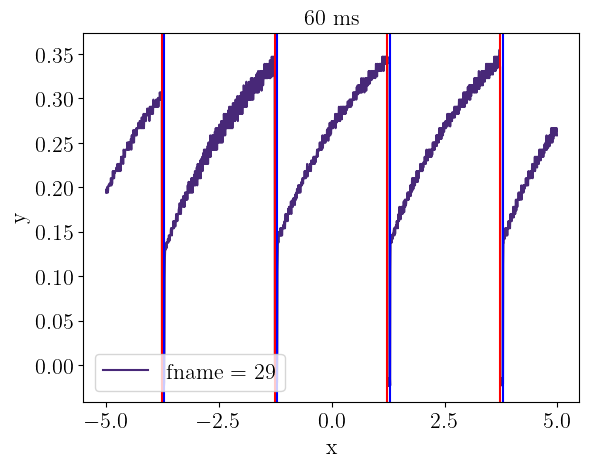

index 11
indices: 560 570
ratio {0} 0.5580128135988093 error 0.006380022344628172
indices: 1060 1070
ratio {1} 0.529945104401605 error 0.004824880186186631
indices: 1560 1570
ratio {2} 0.5170795659338342 error 0.003406182277861594
all ratios:  [0.55801281 0.5299451  0.51707957]
Final recapture ratio (50 ms): 0.5350 ± 0.0121
[ 560 1060 1560]
[ 570 1070 1570]
[[-2.2, 'red', '-'], [-2.15, 'blue', '-'], [0.3, 'red', '-'], [0.35, 'blue', '-'], [2.8, 'red', '-'], [2.85, 'blue', '-']]


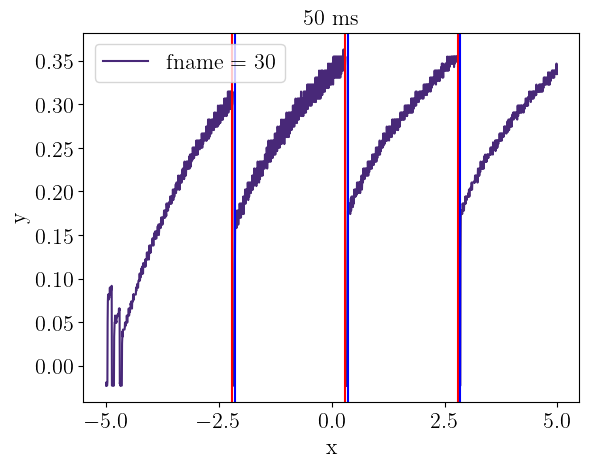

index 12
indices: 271 279
ratio {0} 0.6731272080707466 error 0.003999248708222005
indices: 771 779
ratio {1} 0.6437848101894044 error 0.003930226497555184
indices: 1271 1279
ratio {2} 0.6451502306221136 error 0.0031071740362824214
indices: 1771 1779
ratio {3} 0.6371082742117617 error 0.004133683564937854
all ratios:  [0.67312721 0.64378481 0.64515023 0.63710827]
Final recapture ratio (40 ms): 0.6498 ± 0.0080
[ 271  771 1271 1771]
[ 279  280  779  780 1279 1280 1779 1780 1853 1877]
[[-3.645, 'red', '-'], [-3.605, 'blue', '-'], [-1.145, 'red', '-'], [-1.105, 'blue', '-'], [1.355, 'red', '-'], [1.395, 'blue', '-'], [3.855, 'red', '-'], [3.895, 'blue', '-']]


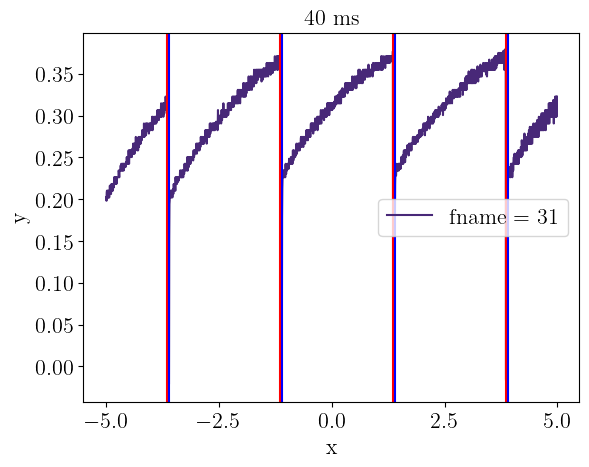

index 13
indices: 295 301
ratio {0} 0.7673839573057282 error 0.003275300537121138
indices: 795 801
ratio {1} 0.7564131343945049 error 0.002547543373907276
indices: 1295 1301
ratio {2} 0.7552568625641716 error 0.0033147005397019935
indices: 1795 1801
ratio {3} 0.7489626153465193 error 0.0030556738688691178
all ratios:  [0.76738396 0.75641313 0.75525686 0.74896262]
Final recapture ratio (30 ms): 0.7570 ± 0.0038
[ 295  795 1295 1795]
[ 301  302  801  802  803 1301 1302 1801 1802]
[[-3.525, 'red', '-'], [-3.495, 'blue', '-'], [-1.025, 'red', '-'], [-0.995, 'blue', '-'], [1.475, 'red', '-'], [1.505, 'blue', '-'], [3.975, 'red', '-'], [4.005, 'blue', '-']]


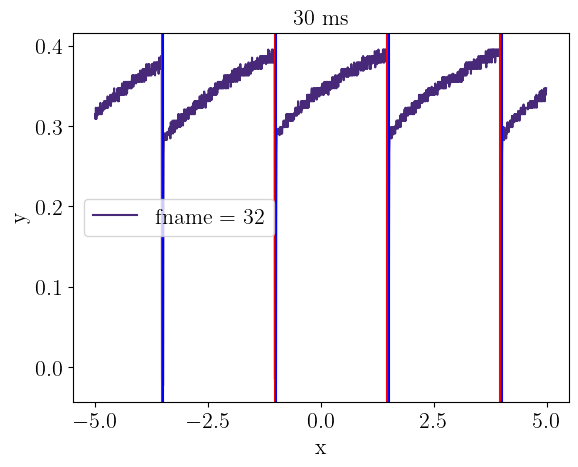

index 14
indices: 90 94
ratio {0} 0.8794781826425316 error 0.004050772133665321
indices: 590 594
ratio {1} 0.8777891167753747 error 0.003571057282620563
indices: 1090 1094
ratio {2} 0.8754074722440097 error 0.002898772910220617
indices: 1590 1594
ratio {3} 0.8865366165792996 error 0.006832914532255255
all ratios:  [0.87947818 0.87778912 0.87540747 0.88653662]
Final recapture ratio (20 ms): 0.8798 ± 0.0024
[  90  590 1090 1590]
[  94   95   96  594  595  596 1094 1095 1096 1510 1594 1595 1596 1597
 1674 1706 1737 1805]
[[-4.55, 'red', '-'], [-4.53, 'blue', '-'], [-2.05, 'red', '-'], [-2.03, 'blue', '-'], [0.45, 'red', '-'], [0.47, 'blue', '-'], [2.95, 'red', '-'], [2.97, 'blue', '-']]


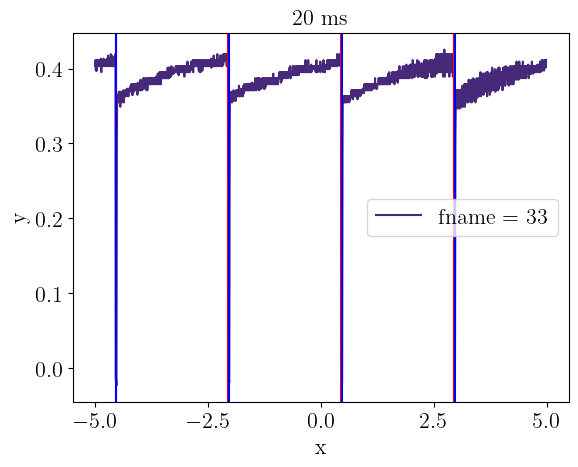

index 15
indices: 502 504
ratio {1} 0.9803448606154435 error 0.0036242122443508784
indices: 1002 1004
ratio {2} 0.9828389609900271 error 0.0027376775990911456
indices: 1502 1504
ratio {3} 0.9767548058239562 error 0.0028055253402898134
all ratios:  [0.98034486 0.98283896 0.97675481]
Final recapture ratio (10 ms): 0.9800 ± 0.0018
[   2  502 1002 1502]
[   4    5    6  158  210  213  218  222  504  505 1004 1005 1006 1504
 1505]
[[-2.49, 'red', '-'], [-2.48, 'blue', '-'], [0.01, 'red', '-'], [0.02, 'blue', '-'], [2.51, 'red', '-'], [2.52, 'blue', '-']]


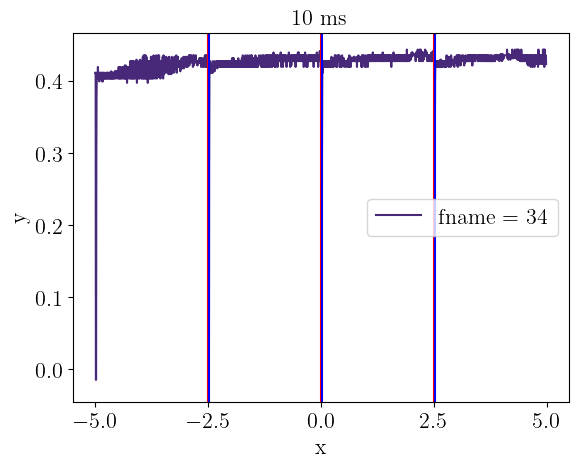

In [12]:
ms_values =     [60,   150,  140,  130,  120,  110,  100,  90,   80,   70,   60,   50,   40,   30,   20,   10]

thresholdsDecrease = [0.07, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.2, 0.05, 0.05, 0.05, 0.05]
thresholdsIncrease = [0.07, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.1, 0.02, 0.02, 0.02, 0.02]
ms_trap_of   =       [60,   150,  140,  130,  120,  110,  100,  90,   80,   70,   60,   50,  40,   30,   20,   10  ]

# idex differnez 500

buffer = 5
step = 0.005 # s


fr_df = pd.DataFrame(columns=["time", "fr", "err"])

for idx, file in enumerate(fnames):

    print("index", idx)
    
    csv_data_1 = pd.read_csv(file, sep=",", skiprows=[1])
    time = csv_data_1["x-axis"]
    volt = csv_data_1["4"]  - background_laser_on # in voltage, not in number of atoms

    thresholdD = thresholdsDecrease[idx]
    thresholdI = thresholdsIncrease[idx]

    gap_indices_decrease = np.where((np.diff(volt)) < -thresholdD)[0]
    gap_indices_increase = np.where((np.diff(volt)) > thresholdI)[0]
    
    
    ratios = []
    errors = []


    v_lines = []
    for i in range(4):
        # if (i==0 and (gap_indices_decrease[0]- up_len) > 0):
        #     pass

        trap_off_in_datapoints = int(ms_trap_of[idx]*1e-3 / step)



        if (gap_indices_decrease[0] + i*500 < len(time)) and  ((gap_indices_decrease[0] + i*500- up_len) >= 0):

        # if (gap_indices_decrease[0] + i*500 < len(time)) and (gap_indices_decrease[0] + i*500 - up_len >= 0):

            v_lines.append([time[gap_indices_decrease[0] + i*500], "red", "-"])
            v_lines.append([time[gap_indices_increase[0] + i*500], "blue", "-"])

            # print("left_indices", gap_indices_decrease[0] + i*500)
            # print("right indices", gap_indices_increase[0] + i*500)

            # meanUP  = volt[331 - up_len : 331].mean()
            # meanLOW = volt[331 + trap_off_in_datapoints + buffer : 331 + trap_off_in_datapoints + buffer + low_len].mean()

            trap_off_in_datapoints = int(ms_trap_of[idx]*1e-3 / step)



            print("indices:", gap_indices_decrease[0] + i*500, gap_indices_increase[0] + i*500)

            meanUP  = volt[gap_indices_decrease[0] + i*500 - up_len: gap_indices_decrease[0] + i*500].mean()
            errorUP = np.std(volt[gap_indices_decrease[0] + i*500 - up_len : gap_indices_decrease[0] + i*500], ddof=1) / np.sqrt(up_len)

            meanLOW = volt[gap_indices_decrease[0] + trap_off_in_datapoints + i*500 + buffer : gap_indices_decrease[0] + trap_off_in_datapoints + i*500 + buffer + low_len].mean()
            errorLOW = np.std(volt[gap_indices_decrease[0] + trap_off_in_datapoints + i*500 + buffer : gap_indices_decrease[0] + trap_off_in_datapoints + i*500 + buffer + low_len], ddof=1) / np.sqrt(low_len)
   
            ratio = meanLOW / meanUP
            error = ratio * np.sqrt((errorLOW / meanLOW)**2 + (errorUP / meanUP)**2)
            print("ratio", {i}, ratio, "error", error)

            # print("arrays:", volt[gap_indices_decrease[0] + i*500 - up_len : gap_indices_decrease[0] + i*500], volt[gap_indices_increase[0] + i*500 : gap_indices_increase[0] + i*500 + low_len])

            ratios.append(ratio)
            errors.append(error)

    ratios = np.array(ratios)
    print("all ratios: ", ratios)
    errors = np.array(errors)

    # Combine results: mean fraction and SEM across the 4 repeats
    final_mean = np.mean(ratios)
    final_sem = np.std(ratios, ddof=1) / np.sqrt(len(ratios))

    print(f"Final recapture ratio ({ms_values[idx]} ms): {final_mean:.4f} ± {final_sem:.4f}")

    fr_df.loc[len(fr_df)] = [ms_values[idx], final_mean, final_sem]

    von1, zu1 = 0, -1

    print(gap_indices_decrease)
    print(gap_indices_increase)
    print(v_lines)

    data_to_range = [
        [time[von1:zu1], volt[von1:zu1], f"fname = {fname_endings[idx]}", c_scheme[1], "-", ""],
    ]

    p_func.plot_with_one_axis_with_vertical_lines(data_to_range, name_x="x", name_y="y", plot_title=f"{ms_trap_of[idx]} ms", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, vlines=v_lines, y_lim = None) # [data_x, data_y, label, colorr, line_style, marker_type], [[x_val, color, linestyle], ...]


# Plot result Above

In [13]:
cols = ["#808080", "#9B9B9B", "#B6B6B6", "#D1D1D1", "#EBEBEB"]

,time,fr,err
0,60.0,0.434761,0.001168
1,150.0,0.078686,0.000745
2,140.0,0.093807,0.000970
3,130.0,0.103733,0.000750
4,120.0,0.124678,0.001557
5,110.0,0.150074,0.001672
6,100.0,0.180985,0.001212
7,90.0,0.233192,0.004879
8,80.0,0.284582,0.004684
9,70.0,0.360420,0.002359


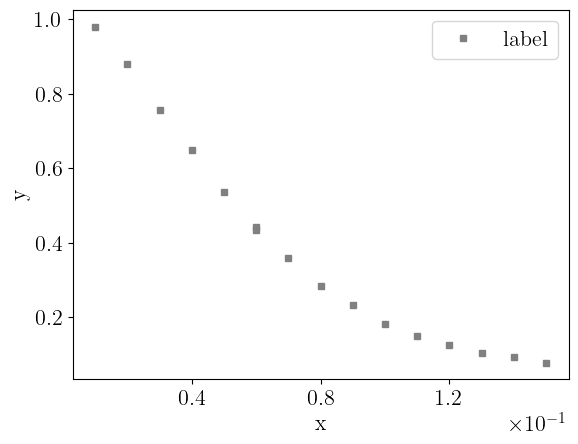

In [14]:
the_data = [
    [fr_df["time"]*1e-3,fr_df["fr"],"label",cols[0],"", "s"]
]

display(fr_df)

p_func.plot_with_one_axis(the_data, name_x="x", name_y="y", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="sci", line_width=1.5, y_lim = None) # [data_x, data_y, label, colorr, line_style, marker_type]


# Fit 

In [15]:
x_data = fr_df["time"].values * 1e-3  # convert ms to s
y_data = fr_df["fr"].values
y_err = fr_df["err"].values  # if you want to include uncertainties

t_fit = np.linspace(min(x_data), max(x_data), 1000)

In [30]:
# Monte Carlo sampling

from scipy.optimize import curve_fit
import numpy as np

Rc_nominal = 0.42e-2  # m
Rc_std = 0.1e-2       # m
n_samples = 500
T_fit_values = []

for _ in range(n_samples):
    Rc_sample = np.random.normal(Rc_nominal, Rc_std)

    def model(t, T):  # <== must accept two arguments: x and fit parameter(s)
        m = 85.47 * const.atomic_mass
        vc = Rc_sample / t
        vt = np.sqrt(2 * const.k * T / m)
        term1 = - (2 * np.exp(- vc**2 / vt**2) * vc) / (np.sqrt(np.pi) * vt)
        term2 = erf(vc / vt)
        return term1 + term2

    initial_guess = [1e-4]  # Rc, T


    popt, pcov = curve_fit(model, x_data, y_data, p0=initial_guess, sigma=y_err, absolute_sigma=True)
    T_fit_values.append(popt[0])

T_fit_values = np.array(T_fit_values)
T_mean = np.mean(T_fit_values)
T_std = np.std(T_fit_values)

print(f"T = {T_mean:.3e} ± {T_std:.3g}")


/tmp/ipykernel_26131/140419755.py:17: RuntimeWarning: invalid value encountered in sqrt
  vt = np.sqrt(2 * const.k * T / m)


T = 2.402e-05 ± 1.09e-05


In [17]:
cols3 = ["#DCD0FF", "#BFAFEF", "#A28EDE", "#856DCE", "#684BBD"] # nice

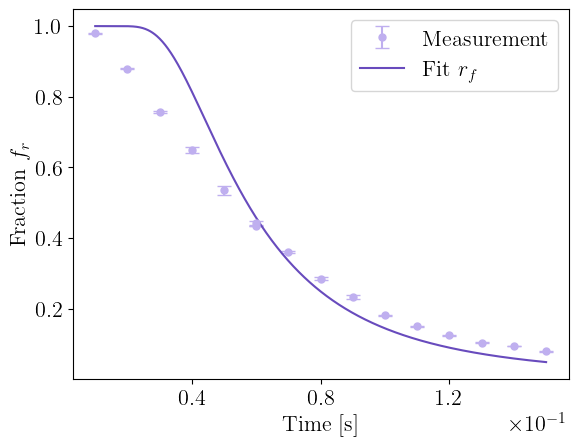

In [28]:
fitted_params = [0.42e-2, 2.35e-05]

def fraction_of_atoms_FORPLOT(t, Rc, T):
    m = 85.47 * const.atomic_mass
    vc = Rc / t
    vt = np.sqrt(2 * const.k * T / m)
    term1 = - (2 * np.exp(- vc**2 / vt**2) * vc) / (np.sqrt(np.pi) * vt)
    term2 = erf(vc / vt)
    return term1 + term2


y_fit_2 = fraction_of_atoms_FORPLOT(t_fit, *fitted_params)


data_with_fits =[
    # [t_fit, y_fit, r"Fit $r_f$, $R^{2} = $"f"{r_squared:.2f}", cols3[2], "-", ""],
    [t_fit, y_fit_2, r"Fit $r_f$"f"", cols3[-1], "-", ""],

]

data_with_errors = [
    [x_data, y_data, y_err, r"Measurement", cols3[1], ""],
]

p_func.one_axis__N_Y_with_error_bars__with_N_fits(data_with_errors, data_with_fits, name_x=r"Time [s]", name_y="Fraction $f_r$", plot_title="", filename_to_save="../Figures/results_temperature", marker_type="o", marker_size="5", capsize_errorbars=5, alpha_data=1.0, font_size=16, offset_text_size=16, legend_size=16, legend_local="best", x_ticks_limit=5)

# R**2

In [31]:
from scipy.special import erf
import numpy as np
from scipy.constants import k as k_B, atomic_mass


# Fitted parameters (Rc and T)
fitted_params = [0.42e-2, 2.402e-05]  # Rc [m], T [K]

# Compute model predictions at x_data points
y_model_at_data = fraction_of_atoms_FORPLOT(x_data, *fitted_params)

# Compute R² value
ss_res = np.sum((y_data - y_model_at_data) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - ss_res / ss_tot

print(f"R² = {r_squared:.3f}")


R² = 0.922
